<a href="https://colab.research.google.com/github/alex-smith-uwec/CS491/blob/main/NaiveBayesAuthors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using sklearn for naive Bayes classifer. Take three authors (James, Wharton, Austen). For each sample from three of their novels.


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
my_path = '/content/drive/MyDrive/CS491/Data/'

# Prepare texts

In [ ]:
import random

def extract_random_words(file_path, num_words=20000):
    """
    Extracts a random sequence of `num_words` consecutive words from a text file.

    :param file_path: Path to the text file.
    :param num_words: Number of consecutive words to extract.
    :return: A string containing the extracted words.
    """
    # Open the file in read-only mode
    with open(file_path, 'r') as file:
        # Read the contents of the file
        text = file.read()

    # Split the text into words
    words = text.split()

    # Check if there are enough words in the file
    if len(words) < num_words:
        raise ValueError(f"The text file does not contain enough words (requires at least {num_words}).")

    # Choose a random start index for the sequence
    start_index = random.randint(0, len(words) - num_words)

    # Extract the sequence of words
    random_words = words[start_index:start_index + num_words]

    # Join the words back into a string
    return ' '.join(random_words)



In [ ]:
author_name = 'Austen'
novels = ['Emma', 'Pride and Prejudice', 'Sense and Sensibility']

# Dictionary to store the snippets
snippets = {}

# Extract snippets from each novel
for novel in novels:
    try:
        file_path = my_path + novel
        snippets[novel] = extract_random_words(file_path)

    except ValueError as e:
        print(f"Error in {novel}: {e}")
    except FileNotFoundError:
        print(f"File not found: {file_path}")

# Concatenate the snippets
sample_variable_name = f"{author_name}_sample"
globals()[sample_variable_name] = " ".join(snippets.values())




In [ ]:
author_name = 'James'
novels = ['The Americans', 'The Golden Bowl','Daisy Miller']

# Dictionary to store the snippets
snippets = {}

# Extract snippets from each novel
for novel in novels:
    try:
        file_path = my_path + novel
        snippets[novel] = extract_random_words(file_path)

    except ValueError as e:
        print(f"Error in {novel}: {e}")
    except FileNotFoundError:
        print(f"File not found: {file_path}")

# Concatenate the snippets
sample_variable_name = f"{author_name}_sample"
globals()[sample_variable_name] = " ".join(snippets.values())

In [ ]:
author_name = 'Wharton'
novels = ['Summer', 'Age of Innocence','Daisy Miller','House of Mirth']

# Dictionary to store the snippets
snippets = {}

# Extract snippets from each novel
for novel in novels:
    try:
        file_path = my_path + novel
        snippets[novel] = extract_random_words(file_path)

    except ValueError as e:
        print(f"Error in {novel}: {e}")
    except FileNotFoundError:
        print(f"File not found: {file_path}")

# Concatenate the snippets
sample_variable_name = f"{author_name}_sample"
globals()[sample_variable_name] = " ".join(snippets.values())

In [ ]:
Austen_sample

In [ ]:
James_sample

In [ ]:
Wharton_sample

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

nltk.download('punkt')

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

from nltk.tokenize import sent_tokenize, word_tokenize

import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def preprocess_text(doc):
    # Tokenize the text into words
    tokens = word_tokenize(doc.lower())

    # Remove punctuation and numbers
    table = str.maketrans('', '', string.punctuation + string.digits)
    tokens = [word.translate(table) for word in tokens]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize the words
    # lemmatizer = WordNetLemmatizer()
    # tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Remove short words
    tokens = [word for word in tokens if len(word) > 3]

    return tokens



In [ ]:
texts = [James_sample, Austen_sample, Wharton_sample]
authors = ["James", "Austen", "Wharton"]


In [ ]:
processed_texts = [preprocess_text(text) for text in texts]
processed_texts = [" ".join(tokens) for tokens in processed_texts]

In [ ]:
def split_text_into_segments(text, segment_length):
    return [text[i:i+segment_length] for i in range(0, len(text), segment_length)]

# Assuming each processed_texts[i] is a ~30,000-word text for an author
segment_length = 1000  # for example, 1000 words per segment
segmented_texts = [split_text_into_segments(text, segment_length) for text in processed_texts]

# Flatten the list of lists, keeping track of the authors
final_texts = []
final_labels = []
authors = ['James', 'Austen', 'Wharton']  # corresponding authors
for author, segments in zip(authors, segmented_texts):
    final_texts.extend(segments)
    final_labels.extend([author] * len(segments))


In [ ]:
len(final_texts[2])

1000

# Now analyze

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(final_texts)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, final_labels, test_size=0.2, random_state=42)


In [ ]:
X

<634x11815 sparse matrix of type '<class 'numpy.int64'>'
	with 72501 stored elements in Compressed Sparse Row format>

In [ ]:
clf = MultinomialNB()
clf.fit(X_train, y_train)


MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Predict on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed performance analysis
print(classification_report(y_test, y_pred))


Accuracy: 0.8582677165354331
              precision    recall  f1-score   support

      Austen       1.00      1.00      1.00        40
       James       0.74      0.82      0.78        38
     Wharton       0.84      0.78      0.81        49

    accuracy                           0.86       127
   macro avg       0.86      0.86      0.86       127
weighted avg       0.86      0.86      0.86       127



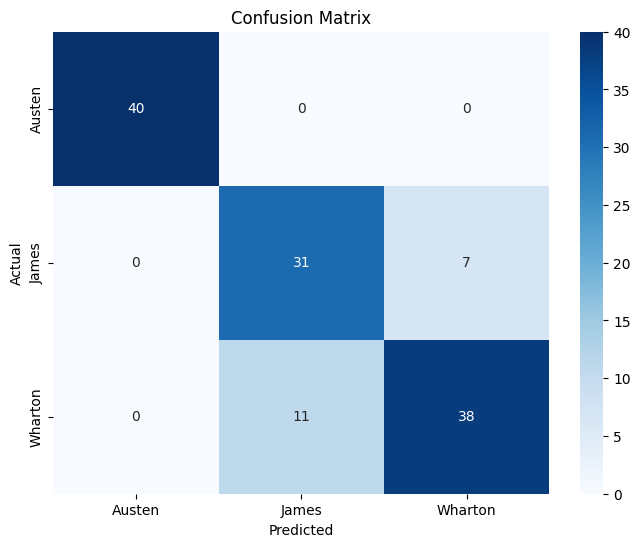

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test are your true labels and y_pred are the predictions made by the model
cm = confusion_matrix(y_test, y_pred, labels=['Austen', 'James', 'Wharton'])

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Austen', 'James', 'Wharton'], yticklabels=['Austen', 'James', 'Wharton'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#sample from Henry James, Turn of the Screw
sample="I turned and saw that Flora, whom, ten minutes before, I had established in the schoolroom with a sheet of white paper, a pencil, and a copy of nice “round O’s,” now presented herself to view at the open door. She expressed in her little way an extraordinary detachment from disagreeable duties, looking to me, however, with a great childish light that seemed to offer it as a mere result of the affection she had conceived for my person, which had rendered necessary that she should follow me. I needed nothing more than this to feel the full force of Mrs. Grose’s comparison, and, catching my pupil in my arms, covered her with kisses in which there was a sob of atonement."


# Preprocess the sample text
preprocessed_sample = preprocess_text(sample)

# Join the tokens back into a single string
processed_sample = " ".join(preprocessed_sample)

# Now processed_sample is ready to be vectorized


In [ ]:
processed_sample

'turned flora minutes established schoolroom sheet white paper pencil copy nice round presented view open door expressed little extraordinary detachment disagreeable duties looking however great childish light seemed offer mere result affection conceived person rendered necessary follow needed nothing feel full force grose comparison catching pupil arms covered kisses atonement'

In [ ]:
test_vector = vectorizer.transform([processed_sample])
predicted_author = clf.predict(test_vector)
print(predicted_author)


['James']
